In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook")

In [366]:
# Loading data and setting index to start from 1, not 0.

In [367]:
df = pd.read_csv('all_data.csv')
df.index = range(1,97)

# Project Scope

The main goal of this analysis is to verify if there is relationship between Life Expectancy and GDP(**G**ross **D**omestic **P**roduct).

Data provides us information about life expectancy (in years), GDP (in USD) in six countries: *Chile*, *China*, *Germany*, *Mexico*, *United States of America* and *Zimbabwe* in years 2000-2015.



# Data Inspection

In [368]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
1,Chile,2000,77.3,7.786093e+10
2,Chile,2001,77.3,7.097992e+10
3,Chile,2002,77.8,6.973681e+10
4,Chile,2003,77.9,7.564346e+10
5,Chile,2004,78.0,9.921039e+10


In [369]:
df.tail()

,Country,Year,Life expectancy at birth (years),GDP
92,Zimbabwe,2011,54.9,1.209845e+10
93,Zimbabwe,2012,56.6,1.424249e+10
94,Zimbabwe,2013,58.0,1.545177e+10
95,Zimbabwe,2014,59.2,1.589105e+10
96,Zimbabwe,2015,60.7,1.630467e+10


In [370]:
list(df.columns)

['Country', 'Year', 'Life expectancy at birth (years)', 'GDP']

In [371]:
# Saving countries and years in variables to use later

In [372]:
country=df['Country'].unique()

In [373]:
year=list(df.Year.unique())
print(year)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [374]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 1 to 96
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [375]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [376]:
df.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [377]:
# Rename collumns - Life expectancy to smiplyfiy, GD to convert values in more readable unit(bilion)

In [378]:
df = df.rename(columns = {'Life expectancy at birth (years)': 'Life expectancy', 'GDP': 'GDP in bilion USD'})

In [379]:
# Converting GDP value to bilion, using .apply atribute and lambda function

In [380]:
df['GDP in bilion USD'] = df['GDP in bilion USD'].apply(lambda x: x*0.000000000001)

In [381]:
# Verifying if everything has converted properly

In [382]:
print(df.head())
print(df.tail())

  Country  Year  Life expectancy  GDP in bilion USD
1   Chile  2000             77.3           0.077861
2   Chile  2001             77.3           0.070980
3   Chile  2002             77.8           0.069737
4   Chile  2003             77.9           0.075643
5   Chile  2004             78.0           0.099210
     Country  Year  Life expectancy  GDP in bilion USD
92  Zimbabwe  2011             54.9           0.012098
93  Zimbabwe  2012             56.6           0.014242
94  Zimbabwe  2013             58.0           0.015452
95  Zimbabwe  2014             59.2           0.015891
96  Zimbabwe  2015             60.7           0.016305


### <b>Determining the max, min and the average value for Life expectancy and GDP columns:</b>

In [383]:
def min_max_mean(column):
    min_val = df[column].min()
    max_val = df[column].max()
    mean_val = df[column].mean()
    return "For {column} min value is {min_val}, max value is {max_val} and the mean is {mean_val}".format(column= column, min_val= min_val, max_val=max_val, mean_val=mean_val)
[min_max_mean('Life expectancy'), min_max_mean('GDP in bilion USD')]

['For Life expectancy min value is 44.3, max value is 81.0 and the mean is 72.78958333333334',
 'For GDP in bilion USD min value is 0.0044157028, max value is 18.099999999999998 and the mean is 3.880498570768396']

In [384]:
def diff_over_time(nation):
    df_nation_2k = df[(df['Country'] == nation) & (df['Year'] == 2000)]
    df_nation_2k15 = df[(df['Country'] == nation) & (df['Year'] == 2015)]
    v_2000_GDP = round(df_nation_2k['GDP in bilion USD'].min(), 4)
    v_2015_GDP = round(df_nation_2k15['GDP in bilion USD'].max(), 4)
    v_2000_Life = round(df_nation_2k['Life expectancy'].min(), 4)
    v_2015_Life = round(df_nation_2k15['Life expectancy'].max(), 4)
    return print("GDP value in {nation} in 2000 is {GDP2000} bilion of USD and GDP in {nation} in 2015 is {GDP2015} bilion of USD.\nLife expectancy in {nation} in 2000 is {life2000}, maximum Life expectancy in {nation} in 2015 is {life2015}.\n".format(nation=nation, GDP2000=v_2000_GDP, GDP2015=v_2015_GDP, life2000=v_2000_Life, life2015=v_2015_Life))

In [385]:
for i in country:
    diff_over_time(i)

GDP value in Chile in 2000 is 0.0779 bilion of USD and GDP in Chile in 2015 is 0.2425 bilion of USD.
Life expectancy in Chile in 2000 is 77.3, maximum Life expectancy in Chile in 2015 is 80.5.

GDP value in China in 2000 is 1.2114 bilion of USD and GDP in China in 2015 is 11.0647 bilion of USD.
Life expectancy in China in 2000 is 71.7, maximum Life expectancy in China in 2015 is 76.1.

GDP value in Germany in 2000 is 1.95 bilion of USD and GDP in Germany in 2015 is 3.3756 bilion of USD.
Life expectancy in Germany in 2000 is 78.0, maximum Life expectancy in Germany in 2015 is 81.0.

GDP value in Mexico in 2000 is 0.6836 bilion of USD and GDP in Mexico in 2015 is 1.1523 bilion of USD.
Life expectancy in Mexico in 2000 is 74.8, maximum Life expectancy in Mexico in 2015 is 76.7.

GDP value in United States of America in 2000 is 10.3 bilion of USD and GDP in United States of America in 2015 is 18.1 bilion of USD.
Life expectancy in United States of America in 2000 is 76.8, maximum Life expe

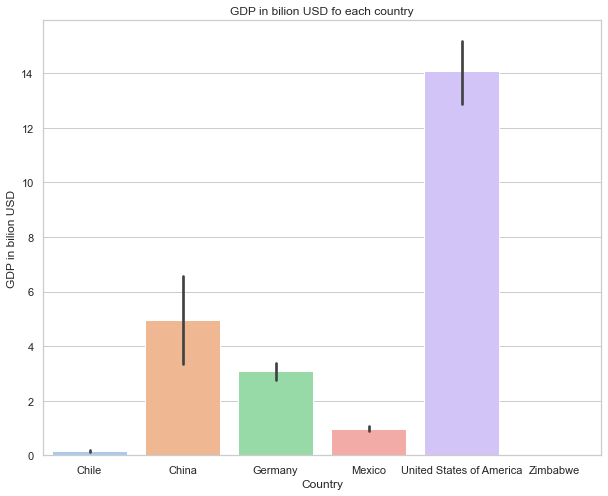

<Figure size 432x288 with 0 Axes>

In [386]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Country', y='GDP in bilion USD')
plt.title("GDP in bilion USD fo each country")
plt.show()
plt.clf()

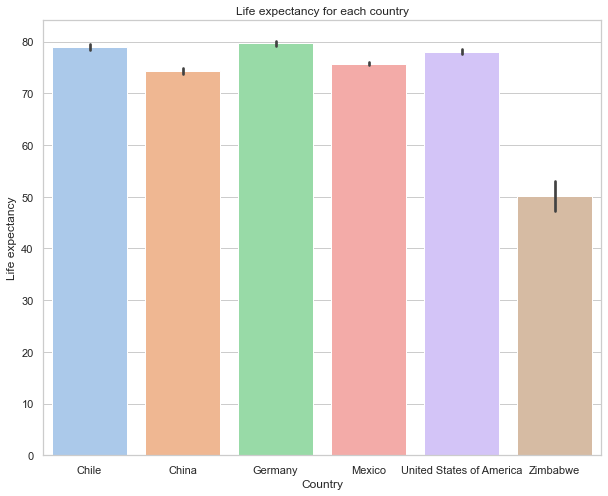

<Figure size 432x288 with 0 Axes>

In [387]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Country', y='Life expectancy')
plt.title("Life expectancy for each country")
plt.show()
plt.clf()

### GDP over time

In [388]:
# Saving top3 and last3 countries for easier plotting (separated by GDP)
# because too big difference makes plotting everything together unreadable

In [389]:
country_top3 = df[(df.Country =='United States of America') | (df.Country =='Germany') | (df.Country =='China')]
country_last3 = df[(df.Country == 'Chile') | (df.Country == 'Mexico') | (df.Country == 'Zimbabwe')]

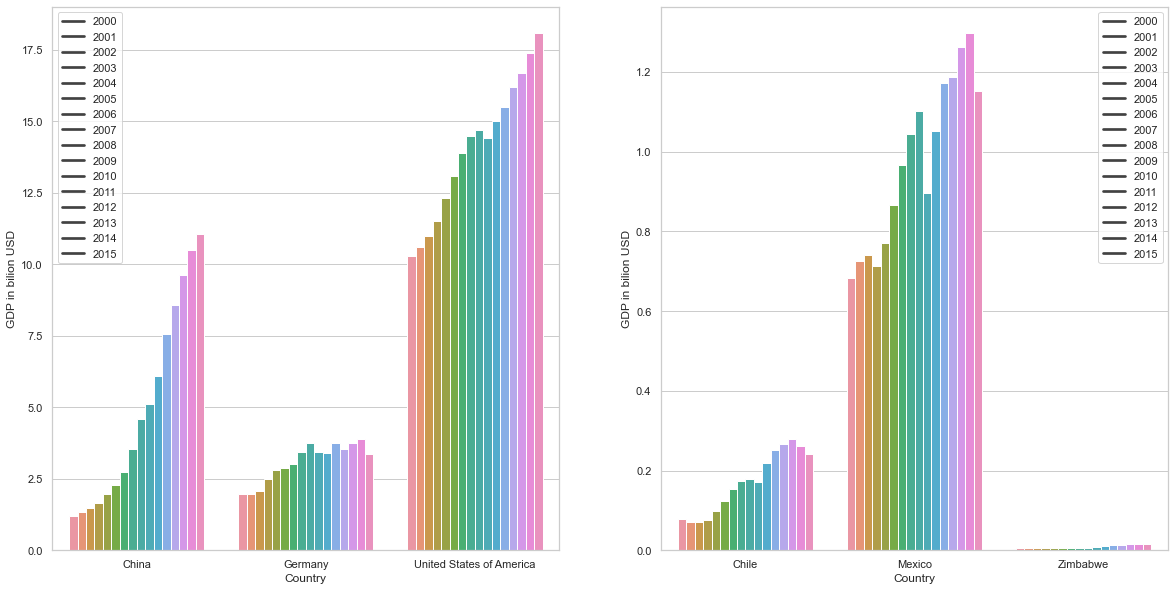

<Figure size 432x288 with 0 Axes>

In [390]:
f, ax = plt.subplots(figsize=(20,10))
ax1=plt.subplot(1,2,1)
sns.barplot(data=country_top3, x='Country', y='GDP in bilion USD', hue='Year')
plt.legend(year)

ax2 = plt.subplot(1,2,2)
sns.barplot(data=country_last3, x='Country', y='GDP in bilion USD', hue='Year')
plt.legend(year)

plt.show()
plt.clf()

## Life expectancy over time

In [391]:
# Saving each country data in separate variable for later & creating variable labels_all for next graphs

In [392]:
chile = df[df['Country']=='Chile']
china = df[df['Country']=='China']
germany = df[df['Country']=='Germany']
mexico = df[df['Country']=='Mexico']
usa = df[df['Country'] =='United States of America']
zimbabwe = df[df['Country'] =='Zimbabwe']
labels_all = ['Chile', 'China', 'Germany', 'Mexico', 'USA',
       'Zimbabwe']

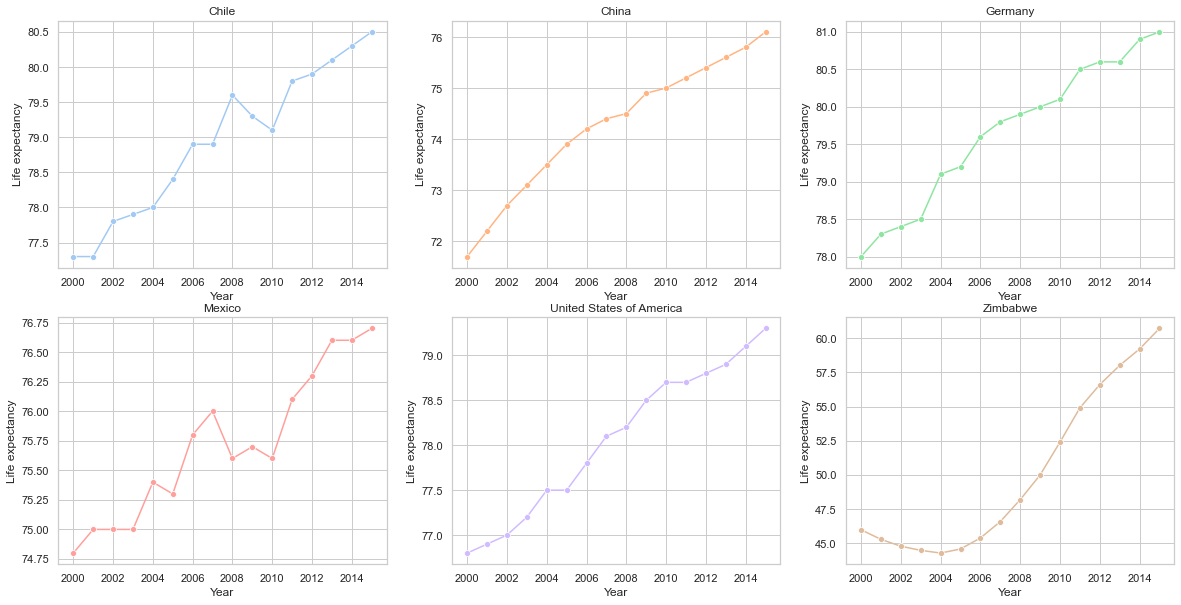

<Figure size 432x288 with 0 Axes>

In [393]:
f = plt.subplots(figsize=(20,10))
ax1 = plt.subplot(2,3,1)
sns.lineplot(data=chile, x='Year', y='Life expectancy', color=(0.6313725490196078, 0.788235294117647, 0.9568627450980393), marker='o')
plt.title(country[0])
ax2 = plt.subplot(2,3,2)
sns.lineplot(data=china, x='Year', y='Life expectancy', color=(1.0, 0.7058823529411765, 0.5098039215686274), marker='o')
plt.title(country[1])
ax3 = plt.subplot(2,3,3)
sns.lineplot(data=germany, x='Year', y='Life expectancy', color=(0.5529411764705883, 0.8980392156862745, 0.6313725490196078), marker='o')
plt.title(country[2])
ax4 = plt.subplot(2,3,4)
sns.lineplot(data=mexico, x='Year', y='Life expectancy', color=(1.0, 0.6235294117647059, 0.6078431372549019), marker='o')
plt.title(country[3])
ax5 = plt.subplot(2,3,5)
sns.lineplot(data=usa, x='Year', y='Life expectancy', color=(0.8156862745098039, 0.7333333333333333, 1.0), marker='o')
plt.title(country[4])
ax6 = plt.subplot(2,3,6)
sns.lineplot(data=zimbabwe, x='Year', y='Life expectancy', color=(0.8705882352941177, 0.7333333333333333, 0.6078431372549019), marker='o')

plt.title(country[5])


plt.show()
plt.clf()

## Avergage Life Expectancy

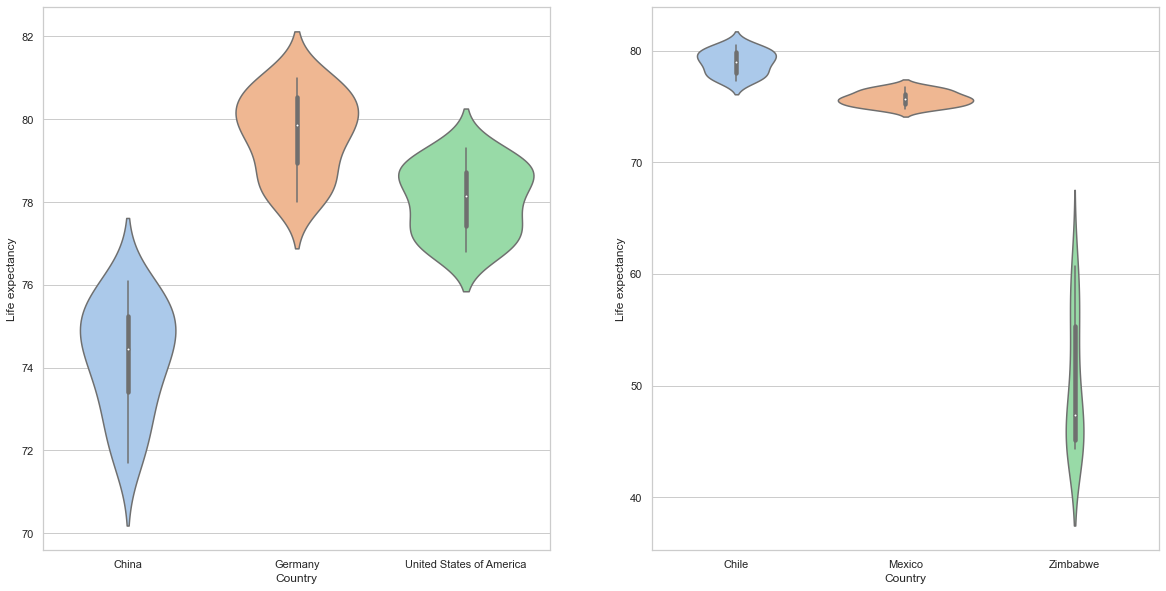

<Figure size 432x288 with 0 Axes>

In [394]:
fig = plt.subplots(figsize=(20,10))

ax1=plt.subplot(1,2,1)
sns.violinplot(data=country_top3, x='Country', y='Life expectancy')
ax2=plt.subplot(1,2,2)
sns.violinplot(data=country_last3, x='Country', y='Life expectancy')


plt.show()
plt.clf()

## Conclusion

* Gross Domestic Product in all of analyzed countries has increased in years 2000-2015
* Life Expectancy in all of analyzed countries has increased over 15 years
* The highest life expectency is in Germany - 81.0
* The lowest life expectancy is in Zimbabwe - 60.7
* USA has the highest GDP value - 18.1 bilion USD
* Zimbabwe has the lowest GDP value - 0.0163 bilion USD

* The biggest difference In analyzed values has been noticed in Zimbabwe:
    - GDP value in 2000 was 0.0067 bilion of USD and 0.0163 bilion of USD in 2015 -> increased of 0.0096 bilion of USD
    - Average life expectancy in 2000 was 46.0 and 60.7 years in 2015 -> increased of almost 15 years


### As expected, we can conclude that there is a relationship between Gross Domestic Product and Life expectancy at birth
    
    
